In [ ]:
from zipfile import ZipFile
with ZipFile('/content/archive.zip', 'r') as Z:
  Z.extractall("/content/archive")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

In [ ]:
import pandas as pd
data = pd.read_csv("/content/archive/healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
data.shape

(5110, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())

In [ ]:
sum(data['bmi'].isna())

0

In [ ]:
data['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['work_type'] = le.fit_transform(data['work_type'])
data['work_type'].unique()

array([2, 3, 0, 4, 1])

In [ ]:
data['gender'] = le.fit_transform(data['gender'])
data['gender'].unique()

array([1, 0, 2])

In [ ]:
data['Residence_type'] = le.fit_transform(data['Residence_type'])
data['Residence_type'].unique()

array([1, 0])

In [ ]:
data['ever_married'] = le.fit_transform(data['ever_married'])
data['ever_married'].unique()

array([1, 0])

In [ ]:
data['smoking_status'] = le.fit_transform(data['smoking_status'])
data['smoking_status'].unique()

array([1, 2, 3, 0])

In [ ]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [ ]:
data.shape

(5110, 12)

In [ ]:
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go


In [ ]:
gender_counts = data['gender'].value_counts()
custom_colors = ['#9C9C9C' , '#252E6C',  '#893F3D']

fig1 = px.bar(gender_counts, x=gender_counts.index, y=gender_counts.values, color=gender_counts.index,
              color_discrete_map={gender: color for gender, color in zip(gender_counts.index, custom_colors)})
fig1.update_layout(title='Gender Distribution')
fig1.show()

In [ ]:
age_stroke_counts = data.groupby(["age", "stroke"]).size().reset_index(name="Count")
fig_bubble_age_stroke = px.scatter(age_stroke_counts, x="age", y="Count", size="Count", color="stroke",
                                   title="Distribution of Stroke Across Age Groups",
                                   labels={"age": "Age", "Count": "Count", "stroke": "Stroke"},
                                   color_discrete_sequence=['#252E6C', '#BC3030'] )

fig_bubble_age_stroke.update_layout(xaxis_title="Age", yaxis_title="Count")
fig_bubble_age_stroke.show()

In [ ]:
stroke_counts = data['stroke'].value_counts().reset_index()
stroke_counts.columns = ['Stroke', 'Count']
custom_colors = ['#252E6C', '#BC3030']
fig = px.pie(stroke_counts, names='Stroke', values='Count',
             title='Distribution of Stroke Status',
             color_discrete_sequence=custom_colors,
             hole=0.3
             )

fig.show()

In [ ]:
gender_stroke_counts = data.groupby(['gender', 'stroke']).size().unstack()
gender_stroke_percentage = (gender_stroke_counts[1] / (gender_stroke_counts[0] + gender_stroke_counts[1])) * 100

fig = px.pie(names=gender_stroke_percentage.index, values=gender_stroke_percentage.values,
             title="Percentage of Stroke Cases by Gender",
             color_discrete_sequence=['#252E6C', '#9C9C9C'])

fig.update_traces(textinfo="percent+label", pull=[0.1, 0], marker=dict(line=dict(color="white", width=2)))
fig.show()

In [ ]:
hypertension_count = data['hypertension'].value_counts()
custom_colors = ['#252E6C', '#9C9C9C']

fig = px.pie(
    values=hypertension_count,
    names=hypertension_count.index,
    hole=0.3,
    title='Distribution of Patients with and without Hypertension',
    color_discrete_sequence=custom_colors,
)

fig.update_traces(textinfo='percent+label', pull=[0, 0.1])
fig.show()

In [ ]:
stroke_rate_with_hypertension = (data[data['hypertension'] == 1]['stroke'].mean()) * 100
stroke_rate_without_hypertension = (data[data['hypertension'] == 0]['stroke'].mean()) * 100

data_1 = pd.DataFrame({'Hypertension': ['With Hypertension', 'Without Hypertension'],
                     'Stroke Rate': [stroke_rate_with_hypertension, stroke_rate_without_hypertension]})
fig = px.bar(data_1, x='Hypertension', y='Stroke Rate',
             text='Stroke Rate', title='Stroke Rate by Hypertension',
             labels={'Hypertension': 'Hypertension Status', 'Stroke Rate': 'Stroke Rate (%)'})

fig.update_traces(marker_color=[ "#123F6A" ,  "#89AED2"])
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.show()

In [ ]:
smoking_status_counts = data['smoking_status'].value_counts().reset_index()
smoking_status_counts.columns = ['smoking_status', 'count']
custom_colors = ['#0E2B59', '#355384', '#7793BE']

fig = px.bar(
    smoking_status_counts,
    x='smoking_status',
    y='count',
    title='Smoking Status Distribution',
    color='smoking_status',
    color_discrete_sequence=custom_colors
)

fig.show()

## BOXPLOT to detect and remove the outliers

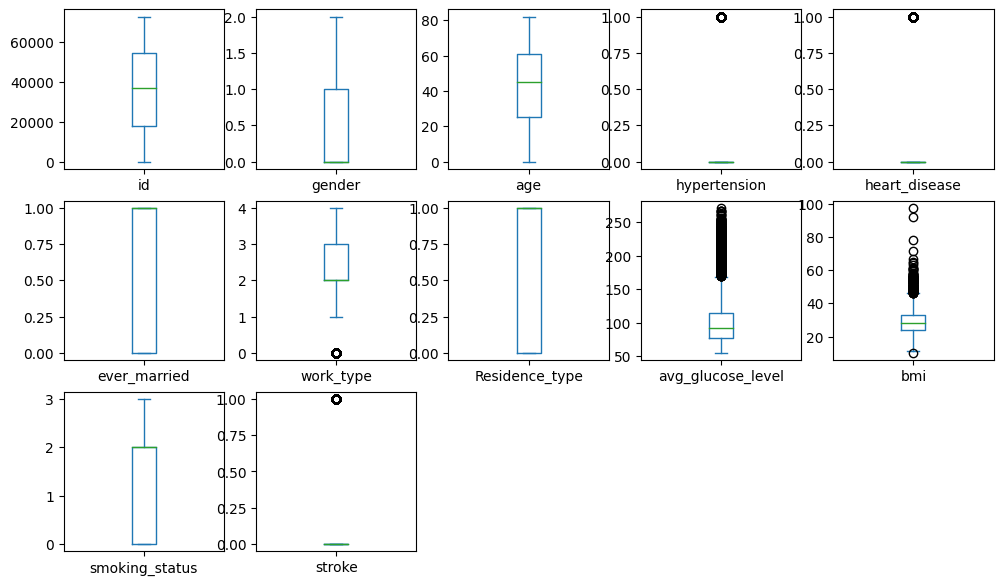

In [ ]:
ax_array = data.plot(kind="box", subplots=True, figsize=(12, 12), layout=(5, 5))
import matplotlib.pyplot as plt
plt.show()

In [ ]:
import numpy as np
Q1 = np.percentile(data['bmi'], 25, method='midpoint')
Q3 = np.percentile(data['bmi'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR, Q3, Q1)


8.999999999999996 32.8 23.8


In [ ]:
# Above Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(data['bmi']>=upper)
print("Upper Bound:",upper)
print(upper_array.sum())

#Below Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(data['bmi']<=lower)
print("Lower Bound:",lower)
print(lower_array.sum())


Upper Bound: 46.29999999999999
125
Lower Bound: 10.300000000000006
1


In [ ]:
upper_array = np.where(data['bmi']>=upper)[0]
lower_array = np.where(data['bmi']<=lower)[0]

In [ ]:
data.drop(index=upper_array, inplace=True)
data.drop(index=lower_array, inplace=True)

In [ ]:
data.shape

(4984, 12)

In [ ]:
X = data.drop(['id', 'stroke'], axis = 1)
y = data['stroke']

In [ ]:
y.value_counts()

stroke
0    4738
1     246
Name: count, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_sm, y_sm = sm.fit_resample(X, y)

In [ ]:
y_sm.value_counts()

stroke
1    4738
0    4738
Name: count, dtype: int64

In [ ]:
X_sm.shape

(9476, 10)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_smss = ss.fit_transform(X_sm)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,  X_test, y_train,y_test = train_test_split(X_sm, y_sm, random_state=0, test_size = 0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.805379746835443

In [ ]:
from sklearn.metrics import classification_report
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       948
           1       0.80      0.81      0.81       948

    accuracy                           0.81      1896
   macro avg       0.81      0.81      0.81      1896
weighted avg       0.81      0.81      0.81      1896



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[758, 190],
       [179, 769]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9266877637130801

In [ ]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       948
           1       0.90      0.96      0.93       948

    accuracy                           0.93      1896
   macro avg       0.93      0.93      0.93      1896
weighted avg       0.93      0.93      0.93      1896



In [ ]:
confusion_matrix(y_test, y_pred)

array([[848, 100],
       [ 39, 909]])

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.7863924050632911

In [ ]:
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.71      0.77       948
           1       0.75      0.86      0.80       948

    accuracy                           0.79      1896
   macro avg       0.79      0.79      0.79      1896
weighted avg       0.79      0.79      0.79      1896



In [ ]:
confusion_matrix(y_test, y_pred)

array([[672, 276],
       [129, 819]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9488396624472574

In [ ]:
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       948
           1       0.93      0.97      0.95       948

    accuracy                           0.95      1896
   macro avg       0.95      0.95      0.95      1896
weighted avg       0.95      0.95      0.95      1896



In [ ]:
confusion_matrix(y_test, y_pred)

array([[884,  64],
       [ 33, 915]])

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.score(X_test, y_test)

0.7890295358649789

In [ ]:
y_pred = gnb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.72      0.77       948
           1       0.75      0.86      0.80       948

    accuracy                           0.79      1896
   macro avg       0.79      0.79      0.79      1896
weighted avg       0.79      0.79      0.79      1896



In [ ]:
confusion_matrix(y_test, y_pred)

array([[683, 265],
       [135, 813]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.919831223628692

In [ ]:
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       948
           1       0.90      0.94      0.92       948

    accuracy                           0.92      1896
   macro avg       0.92      0.92      0.92      1896
weighted avg       0.92      0.92      0.92      1896



In [ ]:
confusion_matrix(y_test, y_pred)

array([[852,  96],
       [ 56, 892]])

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier()
et.fit(X_train, y_train)
et.score(X_test, y_test)

0.9462025316455697

In [ ]:
y_pred = et.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       948
           1       0.93      0.96      0.95       948

    accuracy                           0.95      1896
   macro avg       0.95      0.95      0.95      1896
weighted avg       0.95      0.95      0.95      1896



In [ ]:
confusion_matrix(y_test, y_pred)

array([[880,  68],
       [ 34, 914]])

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
abc.score(X_test, y_test)

0.8391350210970464

In [ ]:
y_pred = abc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       948
           1       0.83      0.85      0.84       948

    accuracy                           0.84      1896
   macro avg       0.84      0.84      0.84      1896
weighted avg       0.84      0.84      0.84      1896



In [ ]:
confusion_matrix(y_test, y_pred)

array([[786, 162],
       [143, 805]])

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc.score(X_test, y_test)

0.8670886075949367

In [ ]:
y_pred = gbc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       948
           1       0.85      0.89      0.87       948

    accuracy                           0.87      1896
   macro avg       0.87      0.87      0.87      1896
weighted avg       0.87      0.87      0.87      1896



In [ ]:
confusion_matrix(y_test, y_pred)

array([[800, 148],
       [104, 844]])

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgbc = HistGradientBoostingClassifier()
hgbc.fit(X_train, y_train)
hgbc.score(X_test, y_test)

0.9277426160337553

In [ ]:
y_pred = hgbc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       948
           1       0.91      0.95      0.93       948

    accuracy                           0.93      1896
   macro avg       0.93      0.93      0.93      1896
weighted avg       0.93      0.93      0.93      1896



In [ ]:
confusion_matrix(y_test, y_pred)

array([[854,  94],
       [ 43, 905]])

## Cross Validation

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, make_scorer, confusion_matrix,  f1_score, precision_score, recall_score
from sklearn import model_selection
import numpy as np
def model_scores(model, x, y):
  F1_score = []
  precision = []
  recall = []
  error = []
  kappa = []
  def classification_report_with_accuracy_score(y_true, y_pred):
    F1_score.append(f1_score(y_true, y_pred, average='micro'))
    precision.append(precision_score(y_true, y_pred, average = 'micro'))
    recall.append(recall_score(y_true, y_pred, average = 'micro'))
    error.append(1-accuracy_score(y_true, y_pred))
    return accuracy_score(y_true, y_pred)

  kfold = model_selection.KFold(n_splits=5,shuffle = True)
  results = model_selection.cross_val_score(model, x, y, cv = kfold, \
                scoring=make_scorer(classification_report_with_accuracy_score))
  print('Accuracy :', np.average(results)*100)
  print('recall : ', np.average(recall)*100)
  print('Precision : ', np.average(precision)*100)
  print('f1_score :', np.average(F1_score)*100)
  print('error : ', np.average(error)*100)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model_scores(LogisticRegression(), X_smss, y_sm)

Accuracy : 80.39251639335137
recall :  80.39251639335137
Precision :  80.39251639335137
f1_score : 80.39251639335137
error :  19.607483606648632


In [ ]:
model_scores(SVC(), X_smss, y_sm)

Accuracy : 85.23643721541254
recall :  85.23643721541254
Precision :  85.23643721541254
f1_score : 85.23643721541254
error :  14.763562784587464


In [ ]:
model_scores(RandomForestClassifier(), X_sm, y_sm)

Accuracy : 94.47025817440966
recall :  94.47025817440966
Precision :  94.47025817440966
f1_score : 94.47025817440966
error :  5.529741825590328


In [ ]:
model_scores(DecisionTreeClassifier(), X_sm, y_sm)

Accuracy : 91.47318615499371
recall :  91.47318615499371
Precision :  91.47318615499371
f1_score : 91.47318615499371
error :  8.52681384500629


In [ ]:
# Logistic Regression, KNN, SVM, Random Forest, Native Bayes, Decision Tree, Extremely Randomized Trees, AdaBoost, Gradient Tree Boosting, and Histogram-Based Gradient Boosting


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier,HistGradientBoostingClassifier,GradientBoostingClassifier, RandomForestClassifier,ExtraTreesClassifier, AdaBoostClassifier

vc = VotingClassifier(estimators = [('abc', AdaBoostClassifier()),('ets', ExtraTreesClassifier()),('rf',RandomForestClassifier()),('dt',DecisionTreeClassifier()), ('gbc', GradientBoostingClassifier()),('hgb', HistGradientBoostingClassifier()),('knn',KNeighborsClassifier()), ('svc',SVC(probability=True)), ('nb',GaussianNB()), ('lr',LogisticRegression())],voting='soft')
vc.fit(X_sm, y_sm)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



VotingClassifier(estimators=[('abc', AdaBoostClassifier()),
                             ('ets', ExtraTreesClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('dt', DecisionTreeClassifier()),
                             ('gbc', GradientBoostingClassifier()),
                             ('hgb', HistGradientBoostingClassifier()),
                             ('knn', KNeighborsClassifier()),
                             ('svc', SVC(probability=True)),
                             ('nb', GaussianNB()),
                             ('lr', LogisticRegression())],
                 voting='soft')

In [ ]:
vc.score(X_test ,y_test)

0.9857594936708861

In [ ]:
from sklearn.metrics import classification_report
y_pred = vc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       948
           1       0.98      1.00      0.99       948

    accuracy                           0.99      1896
   macro avg       0.99      0.99      0.99      1896
weighted avg       0.99      0.99      0.99      1896



In [ ]:
vc = VotingClassifier(estimators = [('ets', ExtraTreesClassifier()),('rf',RandomForestClassifier()),('hgb', HistGradientBoostingClassifier())],voting='soft')
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('ets', ExtraTreesClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('hgb', HistGradientBoostingClassifier())],
                 voting='soft')

In [ ]:
vc.score(X_test ,y_test)

0.9498945147679325

In [ ]:
from sklearn.metrics import classification_report
y_pred = vc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       948
           1       0.93      0.97      0.95       948

    accuracy                           0.95      1896
   macro avg       0.95      0.95      0.95      1896
weighted avg       0.95      0.95      0.95      1896



In [ ]:
vc = VotingClassifier(estimators = [('abc', AdaBoostClassifier()),('dt',DecisionTreeClassifier()),('gbc', GradientBoostingClassifier()),('hgb', HistGradientBoostingClassifier())],voting='soft')
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('abc', AdaBoostClassifier()),
                             ('dt', DecisionTreeClassifier()),
                             ('gbc', GradientBoostingClassifier()),
                             ('hgb', HistGradientBoostingClassifier())],
                 voting='soft')

In [ ]:
vc.score(X_test ,y_test)

0.9309071729957806

In [ ]:
from sklearn.metrics import classification_report
y_pred = vc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       948
           1       0.91      0.95      0.93       948

    accuracy                           0.93      1896
   macro avg       0.93      0.93      0.93      1896
weighted avg       0.93      0.93      0.93      1896



In [ ]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

data = pd.read_csv("/content/archive/healthcare-dataset-stroke-data.csv")

df = pd.DataFrame(data, index=None)


rows = len(df.axes[0])


cols = len(df.axes[1])

print("Number of Instance: ", rows)
print("Number of Attributes: ", cols)

colCon=[]

for i in range(cols-1):
  if(data[df.columns[i]].dtype == 'object'):
    colCon.append(df.columns[i])


print("Categorical Attributes : ",colCon)

Number of Instance:  5110
Number of Attributes:  12
Categorical Attributes :  ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

data[colCon] = data[colCon].apply(label_encoder.fit_transform)
print("Converted Dataset")
print(data)

df = pd.DataFrame(data, index=None)


df.fillna(df.mean(), inplace=True)



X = data.iloc[:, :cols-1]
Y=data.iloc[:,cols-1:]

Converted Dataset
         id  gender   age  hypertension  heart_disease  ever_married  \
0      9046       1  67.0             0              1             1   
1     51676       0  61.0             0              0             1   
2     31112       1  80.0             0              1             1   
3     60182       0  49.0             0              0             1   
4      1665       0  79.0             1              0             1   
...     ...     ...   ...           ...            ...           ...   
5105  18234       0  80.0             1              0             1   
5106  44873       0  81.0             0              0             1   
5107  19723       0  35.0             0              0             1   
5108  37544       1  51.0             0              0             1   
5109  44679       0  44.0             0              0             1   

      work_type  Residence_type  avg_glucose_level   bmi  smoking_status  \
0             2               1          

In [ ]:
from sklearn.feature_selection import RFECV

from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier()
selector = RFECV(estimator, step=1, cv=5)

selector = selector.fit(X, Y)
X_new = selector.transform(X)

print('Selected features Count = ',selector.n_features_)
print('Selected Features = ',selector.get_support(indices=True))
print(X.columns[selector.get_support()].to_list())

clsname=df.columns[cols-1]
clsuni=data[clsname].unique()
print(clsname)
print(clsuni)
print(clsuni.size)

print(data[df.columns[1]].dtype)

Selected features Count =  7
Selected Features =  [ 0  2  6  7  8  9 10]
['id', 'age', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']
stroke
[1 0]
2
int64


In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)

X_sm, Y_sm = sm.fit_resample(X_new, Y)

Y_sm.value_counts()

X_sm.shape

(9722, 7)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from imblearn.over_sampling import SMOTE




vc = VotingClassifier(estimators=[
    ('abc', AdaBoostClassifier()),
    ('ets', ExtraTreesClassifier()),
    ('rf', RandomForestClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('gbc', GradientBoostingClassifier()),
    ('hgb', HistGradientBoostingClassifier()),
    ('knn', KNeighborsClassifier()),
    ('svc', SVC(probability=True)),
    ('nb', GaussianNB()),
    ('lr', LogisticRegression())
], voting='soft')

vc.fit(X_sm, Y_sm)


VotingClassifier(estimators=[('abc', AdaBoostClassifier()),
                             ('ets', ExtraTreesClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('dt', DecisionTreeClassifier()),
                             ('gbc', GradientBoostingClassifier()),
                             ('hgb', HistGradientBoostingClassifier()),
                             ('knn', KNeighborsClassifier()),
                             ('svc', SVC(probability=True)),
                             ('nb', GaussianNB()),
                             ('lr', LogisticRegression())],
                 voting='soft')

In [ ]:
vc.score(X_sm, Y_sm)

0.9994857025303435

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, shuffle=False)
X_train,  X_test, Y_train,Y_test = train_test_split(X_sm, Y_sm, random_state=0, test_size = 0.2)

#kmeans = KMeans(n_clusters=clsuni.size)
kmeans = Birch(n_clusters=clsuni.size)
kmeans.fit(X_train)
yhat = kmeans.predict(X_test)
print(yhat)


[0 0 0 ... 1 0 1]


In [ ]:
import sklearn.metrics as metrics
score = metrics.accuracy_score(Y_test,yhat)
print(score)

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline


gbc = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.5,
                                 random_state=100,
                                max_features=5 )



gbc.fit(X_train, Y_train)
pred_y_gbc = gbc.predict(X_test)

boost_acc = metrics.accuracy_score(Y_test, pred_y_gbc)
print("GradientBoosting = ",boost_acc)


0.5115681233933161
GradientBoosting =  0.9686375321336761


In [ ]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns


boosting_classification_models = ['Boosting_DT-1', 'Boosting_KNN',  'Boosting_RF-1', 'Boosting_DT-2', 'Boosting_RF-2']

boosting_classifiers = []

boosting_classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=10, learning_rate=0.02))
boosting_classifiers.append(AdaBoostClassifier(GradientBoostingClassifier(), n_estimators=30, learning_rate=0.02))
boosting_classifiers.append(AdaBoostClassifier(RandomForestClassifier(), n_estimators=50, learning_rate=0.02))
boosting_classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=50, learning_rate=0.03))
boosting_classifiers.append(AdaBoostClassifier(RandomForestClassifier(), n_estimators=50, learning_rate=0.04))

boosting_train_accuracies = []
boosting_test_accuracies = []

for boosting_classifier in boosting_classifiers:
    boosting_pipeline = Pipeline(steps = [
              ('boosting_classifier',boosting_classifier)
           ])

    print(f'--------------START OF THE {boosting_classifier} MODEL--------------\n')

    print(f'Training the {boosting_classifier} model')
    boosting_model = boosting_pipeline.fit(X_train, Y_train)

    print('\nTraining Info:')

    boosting_train_predictions = boosting_model.predict(X_train)
    boosting_train_accuracy = metrics.accuracy_score(Y_train, boosting_train_predictions)
    boosting_train_accuracies.append(boosting_train_accuracy)
    print(f'{boosting_classifier} model training accuracy: {boosting_train_accuracy}')

    print(f'\nTesting the {boosting_classifier} model')

    print('\nTesting Info:')

    boosting_test_predictions = boosting_model.predict(X_test)
    boosting_test_accuracy = metrics.accuracy_score(Y_test, boosting_test_predictions)
    boosting_test_accuracies.append(boosting_test_accuracy)
    print(f'{boosting_classifier} model testing accuracy: {boosting_test_accuracy}')

    print(f'\n--------------END OF THE {boosting_classifier} MODEL--------------\n\n')

print('Boosting Train Accuracy = ',boosting_train_accuracies)
print('Boosting Test Accuracy = ',boosting_test_accuracies)

boosting_model_accuracy_compare = pd.DataFrame({'Boosting Algorithm' : boosting_classification_models, 'Boosting Training Accuracy' : boosting_train_accuracies, 'Boosting Testing Accuracy' : boosting_test_accuracies})
boosting_model_accuracy_compare.sort_values(by='Boosting Testing Accuracy', ascending=False)




--------------START OF THE AdaBoostClassifier(estimator=DecisionTreeClassifier(), learning_rate=0.02,
                   n_estimators=10) MODEL--------------

Training the AdaBoostClassifier(estimator=DecisionTreeClassifier(), learning_rate=0.02,
                   n_estimators=10) model

Training Info:
AdaBoostClassifier(estimator=DecisionTreeClassifier(), learning_rate=0.02,
                   n_estimators=10) model training accuracy: 1.0

Testing the AdaBoostClassifier(estimator=DecisionTreeClassifier(), learning_rate=0.02,
                   n_estimators=10) model

Testing Info:
AdaBoostClassifier(estimator=DecisionTreeClassifier(), learning_rate=0.02,
                   n_estimators=10) model testing accuracy: 0.9485861182519281

--------------END OF THE AdaBoostClassifier(estimator=DecisionTreeClassifier(), learning_rate=0.02,
                   n_estimators=10) MODEL--------------


--------------START OF THE AdaBoostClassifier(estimator=GradientBoostingClassifier(), learning_ra

,Boosting Algorithm,Boosting Training Accuracy,Boosting Testing Accuracy
2,Boosting_RF-1,1.000000,0.973779
4,Boosting_RF-2,1.000000,0.973265
1,Boosting_KNN,0.971069,0.965553
0,Boosting_DT-1,1.000000,0.948586
3,Boosting_DT-2,1.000000,0.947044


In [ ]:
from sklearn.metrics import classification_report


print('-------------- Classification Report for Gradient Boosting Classifier --------------')
print(classification_report(Y_test, pred_y_gbc))
print('----------------------------------------------------------------------\n')

for i, boosting_classifier in enumerate(boosting_classifiers):
    print(f'-------------- Classification Report for {boosting_classification_models[i]} Model --------------')
    y_pred = boosting_classifier.predict(X_test)
    print(classification_report(Y_test, y_pred))
    print('----------------------------------------------------------------------\n')


-------------- Classification Report for Gradient Boosting Classifier --------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       973
           1       0.98      0.96      0.97       972

    accuracy                           0.97      1945
   macro avg       0.97      0.97      0.97      1945
weighted avg       0.97      0.97      0.97      1945

----------------------------------------------------------------------

-------------- Classification Report for Boosting_DT-1 Model --------------
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       973
           1       0.95      0.95      0.95       972

    accuracy                           0.95      1945
   macro avg       0.95      0.95      0.95      1945
weighted avg       0.95      0.95      0.95      1945

----------------------------------------------------------------------

-------------- Classification Report for 

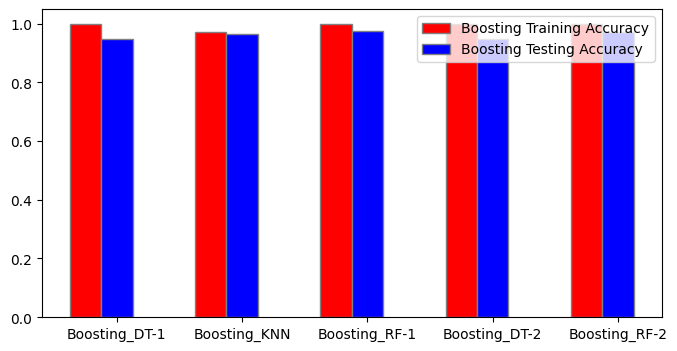

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
barWidth = 0.25
fig = plt.subplots(figsize =(8, 4))

br1 = np.arange(len(boosting_train_accuracies))
br2 = [x + barWidth for x in br1]

plt.bar(br1, boosting_train_accuracies, color ='r', width = barWidth,
        edgecolor ='grey', label ='Boosting Training Accuracy')
plt.bar(br2, boosting_test_accuracies, color ='b', width = barWidth,
        edgecolor ='grey', label ='Boosting Testing Accuracy')

plt.xticks([r + barWidth for r in range(len(boosting_train_accuracies))],
        ['Boosting_DT-1', 'Boosting_KNN',  'Boosting_RF-1', 'Boosting_DT-2', 'Boosting_RF-2'])

plt.legend()
plt.show()

Bagging Accuracy =  0.9681233933161953
--------------START OF THE BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=25) MODEL--------------

Training the BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=25) model

Training Info:
BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=25) model training accuracy: 0.9997428314259997

Testing the BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=25) model

Testing Info:
BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=25) model testing accuracy: 0.9676092544987146

--------------END OF THE BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=25) MODEL--------------


--------------START OF THE BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=50) MODEL--------------

Training the BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=50) model

Training Info:
BaggingClassifier(estimator=KNeighborsClassifier(), n_estimato

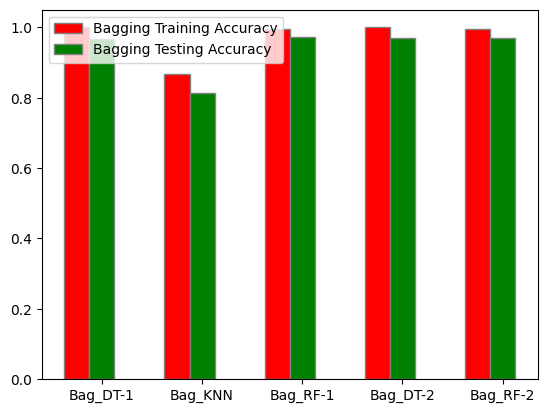

In [ ]:
from sklearn.ensemble import BaggingClassifier
bc = DecisionTreeClassifier()
iter = 50

bag = BaggingClassifier(base_estimator=bc, n_estimators=iter)

bag.fit(X_train, Y_train)

pred_y_bag = bag.predict(X_test)

bag_acc = metrics.accuracy_score(Y_test, pred_y_bag)
print("Bagging Accuracy = ", bag_acc)



bagging_classification_models = ['Bag_DT-1', 'Bag_KNN',  'Bag_RF-1', 'Bag_DT-2', 'Bag_RF-2']

bagging_classifiers = []



bagging_classifiers.append(BaggingClassifier(DecisionTreeClassifier(), n_estimators=25))
bagging_classifiers.append(BaggingClassifier(KNeighborsClassifier(), n_estimators=50))
bagging_classifiers.append(BaggingClassifier(RandomForestClassifier(), n_estimators=100))
bagging_classifiers.append(BaggingClassifier(DecisionTreeClassifier(), n_estimators=100))
bagging_classifiers.append(BaggingClassifier(RandomForestClassifier(), n_estimators=100))

bagging_train_accuracies = []
bagging_test_accuracies = []

for bagging_classifier in bagging_classifiers:
    bagging_pipeline = Pipeline(steps = [
              ('bagging_classifier',bagging_classifier)
           ])

    print(f'--------------START OF THE {bagging_classifier} MODEL--------------\n')

    print(f'Training the {bagging_classifier} model')
    bagging_model = bagging_pipeline.fit(X_train, Y_train)

    print('\nTraining Info:')

    bagging_train_predictions = bagging_model.predict(X_train)
    bagging_train_accuracy = metrics.accuracy_score(Y_train, bagging_train_predictions)
    bagging_train_accuracies.append(bagging_train_accuracy)
    print(f'{bagging_classifier} model training accuracy: {bagging_train_accuracy}')

    print(f'\nTesting the {bagging_classifier} model')

    print('\nTesting Info:')

    bagging_test_predictions = bagging_model.predict(X_test)
    bagging_test_accuracy = metrics.accuracy_score(Y_test, bagging_test_predictions)
    bagging_test_accuracies.append(bagging_test_accuracy)
    print(f'{bagging_classifier} model testing accuracy: {bagging_test_accuracy}')

    print(f'\n--------------END OF THE {bagging_classifier} MODEL--------------\n\n')

print('Bagging Train Accuracy = ',bagging_train_accuracies)
print('Bagging Test Accuracy = ',bagging_test_accuracies)

bagging_model_accuracy_compare = pd.DataFrame({'Bagging Algorithm' : bagging_classification_models, 'Bagging Training Accuracy' : bagging_train_accuracies, 'Bagging Testing Accuracy' : bagging_test_accuracies})
bagging_model_accuracy_compare.sort_values(by='Bagging Testing Accuracy', ascending=False)

br1 = np.arange(len(bagging_train_accuracies))
br2 = [x + barWidth for x in br1]

plt.bar(br1, bagging_train_accuracies, color ='r', width = barWidth,
        edgecolor ='grey', label ='Bagging Training Accuracy')
plt.bar(br2, bagging_test_accuracies, color ='g', width = barWidth,
        edgecolor ='grey', label ='Bagging Testing Accuracy')

plt.xticks([r + barWidth for r in range(len(bagging_train_accuracies))],
        ['Bag_DT-1', 'Bag_KNN',  'Bag_RF-1', 'Bag_DT-2', 'Bag_RF-2'])

plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Classification report for initial Bagging Classifier
print('-------------- Classification Report for Bagging Classifier --------------')
print(classification_report(Y_test, pred_y_bag))
print('----------------------------------------------------------------------\n')

# Classification reports for other Bagging-based models
for i, bagging_classifier in enumerate(bagging_classifiers):
    print(f'-------------- Classification Report for {bagging_classification_models[i]} Model --------------')
    y_pred = bagging_classifier.predict(X_test)
    print(classification_report(Y_test, y_pred))
    print('----------------------------------------------------------------------\n')


-------------- Classification Report for Bagging Classifier --------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       973
           1       0.99      0.94      0.97       972

    accuracy                           0.97      1945
   macro avg       0.97      0.97      0.97      1945
weighted avg       0.97      0.97      0.97      1945

----------------------------------------------------------------------

-------------- Classification Report for Bag_DT-1 Model --------------
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       973
           1       0.98      0.95      0.97       972

    accuracy                           0.97      1945
   macro avg       0.97      0.97      0.97      1945
weighted avg       0.97      0.97      0.97      1945

----------------------------------------------------------------------

-------------- Classification Report for Bag_KNN Model -

VC Accuracy =  0.9681233933161953


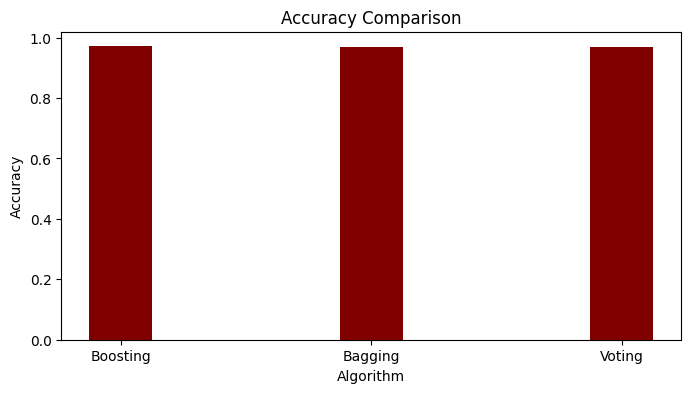

In [ ]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators = [('gbc', GradientBoostingClassifier()),('bag', BaggingClassifier())],voting='soft')
vc.fit(X_train, Y_train)
pred_y_vc = vc.predict(X_test)
vc_acc = metrics.accuracy_score(Y_test, pred_y_vc)

print('VC Accuracy = ',vc_acc)


data = {'Boosting': boost_acc, 'Bagging':bag_acc, 'Voting':vc_acc}

alg = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (8, 4))

plt.bar(alg, values, color ='maroon',
        width = 0.25)

plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print('-------------- Classification Report for Voting Classifier --------------')
print(classification_report(Y_test, pred_y_vc))
print('----------------------------------------------------------------------\n')


-------------- Classification Report for Voting Classifier --------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       973
           1       0.99      0.94      0.97       972

    accuracy                           0.97      1945
   macro avg       0.97      0.97      0.97      1945
weighted avg       0.97      0.97      0.97      1945

----------------------------------------------------------------------

